In [3]:
import cv2
import numpy as np

def calculate_histogram(image_path):
    # Đọc hình ảnh từ file
    frame = cv2.imread(image_path)
    if frame is None:
        print("Không thể đọc hình ảnh.")
        return None
    
    # Chuyển đổi hình ảnh sang không gian màu HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Tính histogram cho 3 kênh HSV
    hist = cv2.calcHist([hsv_frame], [0, 1, 2], None, [8, 8, 8], [0, 180, 0, 256, 0, 256])
    # Chuẩn hóa histogram
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Đường dẫn đến video
image_path = "/home/thiendc/projects/video_summarization/gt_keyframe/keyframe_0041.jpg"

# Gọi hàm calculate_histogram
calculate_histogram(image_path)


array([4.73981708e-01, 4.77542691e-02, 2.67578438e-02, 2.46498026e-02,
       2.08928436e-02, 3.71412784e-02, 3.96076553e-02, 4.19287413e-01,
       1.53551057e-01, 8.25299472e-02, 3.79783325e-02, 1.92859173e-02,
       5.72782476e-03, 1.97646348e-03, 3.58338992e-04, 2.51957099e-04,
       2.04698354e-01, 9.55365375e-02, 2.56156381e-02, 7.21437158e-03,
       1.62932265e-03, 3.16346152e-04, 1.17579984e-04, 2.79952328e-05,
       1.11678585e-01, 4.01535630e-02, 4.73959325e-03, 8.93047953e-04,
       2.74353282e-04, 1.20379504e-04, 1.67971411e-05, 0.00000000e+00,
       6.09960146e-02, 1.67075563e-02, 1.32417458e-03, 1.70770931e-04,
       3.63938052e-05, 1.95966641e-05, 0.00000000e+00, 0.00000000e+00,
       2.49045603e-02, 5.33309206e-03, 1.70770931e-04, 1.95966641e-05,
       1.39976164e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.15368357e-02, 1.20099552e-03, 1.39976164e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [4]:
from src.logger.logger import Logging

log= Logging()
log.error('test')

2024-11-14 08:24:44 UTC+7 | ERROR    | src.logger.logger:error:101 | test


Histogram của từng kênh HSV đã được tính.


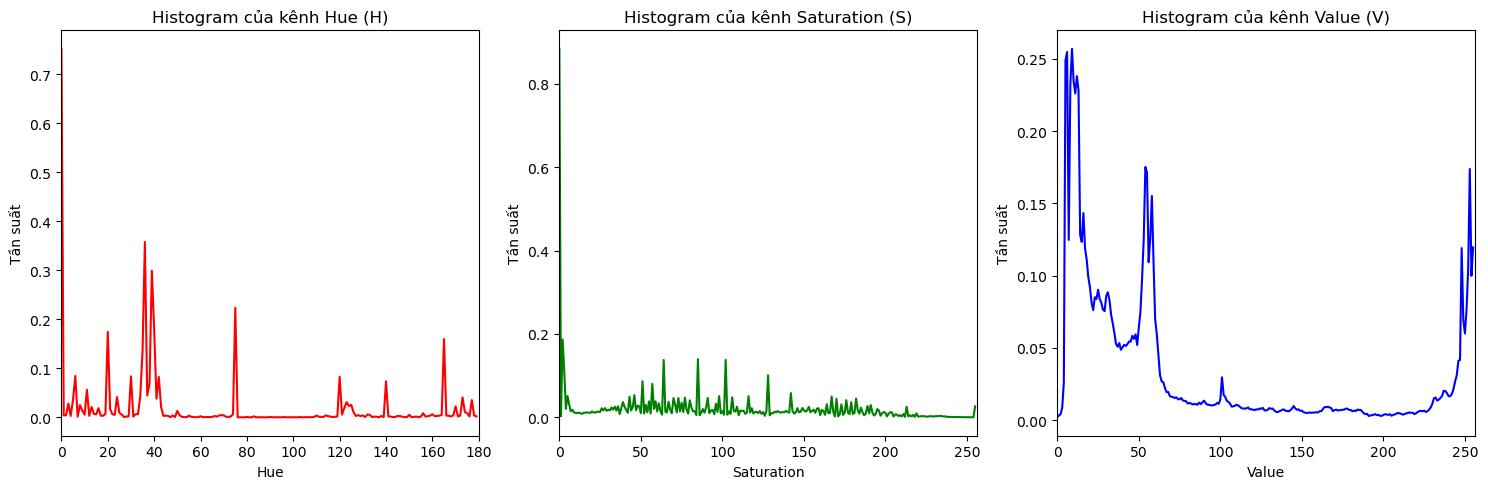

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_hsv_histogram(image_path):
    # Đọc hình ảnh từ file
    frame = cv2.imread(image_path)
    if frame is None:
        print("Không thể đọc hình ảnh.")
        return None, None, None

    # Chuyển đổi hình ảnh sang không gian màu HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Tính histogram cho từng kênh HSV
    hist_hue = cv2.calcHist([hsv_frame], [0], None, [180], [0, 180])
    hist_saturation = cv2.calcHist([hsv_frame], [1], None, [256], [0, 256])
    hist_value = cv2.calcHist([hsv_frame], [2], None, [256], [0, 256])

    # Chuẩn hóa các histogram
    hist_hue = cv2.normalize(hist_hue, hist_hue).flatten()
    hist_saturation = cv2.normalize(hist_saturation, hist_saturation).flatten()
    hist_value = cv2.normalize(hist_value, hist_value).flatten()

    return hist_hue, hist_saturation, hist_value

def visualize_hsv_histogram(hist_hue, hist_saturation, hist_value):
    # Vẽ histogram của từng kênh HSV
    plt.figure(figsize=(15, 5))
    
    # Histogram của kênh Hue
    plt.subplot(1, 3, 1)
    plt.plot(hist_hue, color='red')
    plt.title('Histogram của kênh Hue (H)')
    plt.xlabel('Hue')
    plt.ylabel('Tần suất')
    plt.xlim([0, 180])

    # Histogram của kênh Saturation
    plt.subplot(1, 3, 2)
    plt.plot(hist_saturation, color='green')
    plt.title('Histogram của kênh Saturation (S)')
    plt.xlabel('Saturation')
    plt.ylabel('Tần suất')
    plt.xlim([0, 256])

    # Histogram của kênh Value
    plt.subplot(1, 3, 3)
    plt.plot(hist_value, color='blue')
    plt.title('Histogram của kênh Value (V)')
    plt.xlabel('Value')
    plt.ylabel('Tần suất')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Đường dẫn đến hình ảnh .jpg
image_path = "/home/thiendc/projects/video_summarization/gt_keyframe/keyframe_0041.jpg"

# Tính toán histogram của từng kênh HSV
hist_hue, hist_saturation, hist_value = calculate_hsv_histogram(image_path)

if hist_hue is not None and hist_saturation is not None and hist_value is not None:
    print("Histogram của từng kênh HSV đã được tính.")
    # Trực quan hóa histogram của từng kênh
    visualize_hsv_histogram(hist_hue, hist_saturation, hist_value)


In [12]:
import cv2
import numpy as np

def get_dominant_hue_saturation_value(image_path):
    # Đọc hình ảnh từ file
    frame = cv2.imread(image_path)
    if frame is None:
        print("Không thể đọc hình ảnh.")
        return None, None, None

    # Chuyển đổi hình ảnh sang không gian màu HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Tính histogram cho kênh Hue (H), Saturation (S), và Value (V)
    hist_hue = cv2.calcHist([hsv_frame], [0], None, [180], [0, 180])
    hist_saturation = cv2.calcHist([hsv_frame], [1], None, [256], [0, 256])
    hist_value = cv2.calcHist([hsv_frame], [2], None, [256], [0, 256])

    # Tìm giá trị chiếm ưu thế của Hue, Saturation và Value
    dominant_hue = np.argmax(hist_hue)
    dominant_saturation = np.argmax(hist_saturation)
    dominant_value = np.argmax(hist_value)

    return dominant_hue, dominant_saturation, dominant_value

def map_hue_saturation_value_to_color(hue, saturation, value):
    # Nhận diện màu sắc dựa trên Hue, Saturation và Value
    if value < 50:
        return 'Black'
    elif saturation < 50 and value > 200:
        return 'White'
    elif saturation < 50 and 50 <= value <= 200:
        return 'Gray'
    elif 0 <= hue < 15 or 160 <= hue <= 180:
        return 'Red'
    elif 15 <= hue < 35:
        return 'Orange'
    elif 35 <= hue < 45:
        return 'Yellow'
    elif 45 <= hue < 75:
        return 'Green'
    elif 75 <= hue < 105:
        return 'Cyan'
    elif 105 <= hue < 135:
        return 'Blue'
    elif 135 <= hue < 160:
        return 'Purple'
    else:
        return 'Unknown Color'

# Đường dẫn đến hình ảnh .jpg
image_path = "/home/thiendc/projects/video_summarization/gt_keyframe/keyframe_0045.jpg"

# Lấy giá trị chiếm ưu thế của Hue, Saturation và Value
dominant_hue, dominant_saturation, dominant_value = get_dominant_hue_saturation_value(image_path)

if dominant_hue is not None and dominant_saturation is not None and dominant_value is not None:
    dominant_color = map_hue_saturation_value_to_color(dominant_hue, dominant_saturation, dominant_value)
    print(f"Màu sắc chiếm ưu thế trong hình ảnh là: {dominant_color} (H: {dominant_hue}, S: {dominant_saturation}, V: {dominant_value})")


Màu sắc chiếm ưu thế trong hình ảnh là: Yellow (H: 40, S: 163, V: 143)


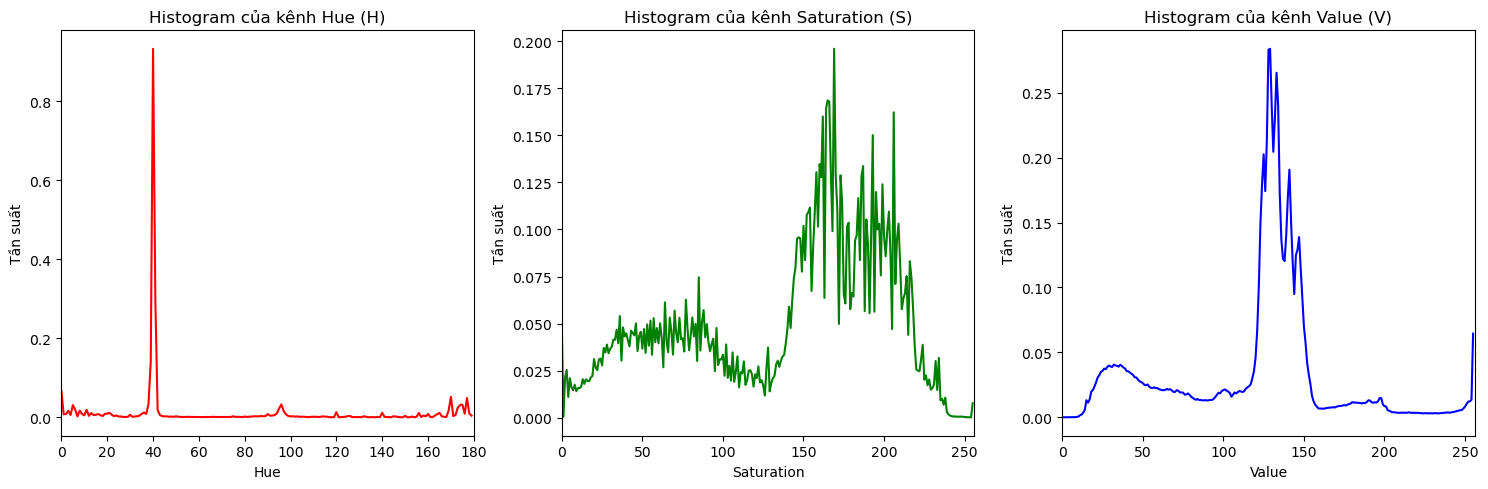

In [7]:
hist_hue, hist_saturation, hist_value = calculate_hsv_histogram("/home/thiendc/projects/video_summarization/gt_keyframe/keyframe_0055.jpg")
visualize_hsv_histogram(hist_hue, hist_saturation, hist_value)

In [14]:
def get_dominant_color_rgb(image_path):
    # Đọc hình ảnh từ file
    image = cv2.imread(image_path)

    if image is None:
        print("Không thể đọc hình ảnh.")
        return None

    # Tính trung bình giá trị của các kênh R, G, B
    average_color = cv2.mean(image)[:3]  # (B, G, R)

    # Chuyển đổi sang thứ tự (R, G, B)
    average_color = average_color[::-1]

    # Xác định màu chủ đạo
    r, g, b = average_color
    if r > g and r > b:
        return 'Red'
    elif g > r and g > b:
        return 'Green'
    elif b > r and b > g:
        return 'Blue'
    elif abs(r - g) < 20 and abs(g - b) < 20:
        return 'Gray'
    else:
        return 'Unknown Color'

# Đường dẫn đến hình ảnh đã tải lên
image_path = "/home/thiendc/projects/video_summarization/gt_keyframe/keyframe_0041.jpg"

# Lấy màu sắc chủ đạo trong không gian RGB
dominant_color_rgb = get_dominant_color_rgb(image_path)

dominant_color_rgb


'Green'

In [9]:
import cv2
import pandas as pd

# Đọc file CSV với danh sách màu
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('/home/thiendc/projects/video_summarization/v2/data/colors_v2.csv', header=0)

# Hàm tìm tên màu gần nhất
def get_color_name(R, G, B):
    minimum = 10000
    cname = None
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "r"])) + abs(G - int(csv.loc[i, "g"])) + abs(B - int(csv.loc[i, "b"]))
        if d < minimum:
            minimum = d
            cname = csv.loc[i, "color name"]
    return cname

# Đọc ảnh từ file
img_path = "./data/sample.png"
img = cv2.imread(img_path)

if img is not None:
    # Lấy kích thước hình ảnh
    h, w, _ = img.shape

    # Chọn điểm giữa ảnh để phân tích
    center_x, center_y = w // 2, h // 2
    b, g, r = img[center_y, center_x]
    b, g, r = int(b), int(g), int(r)

    # Tìm màu gần nhất
    color_name = get_color_name(r, g, b)

    # In kết quả
    print(f"Màu gần nhất tại điểm trung tâm của ảnh là: {color_name} (R={r}, G={g}, B={b})")
else:
    print("Không thể đọc hình ảnh.")


Màu gần nhất tại điểm trung tâm của ảnh là: Olive Drab (Web) (Olive Drab #3) (R=100, G=141, B=60)


In [20]:
import cv2

img = cv2.imread('/home/thiendc/projects/video_summarization/v2/src/color_domain/base.py')
img

In [48]:
import pandas as pd
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor

def main_color_check(input_string):
    # Danh sách màu
    color_pallete = ['black', 'white', 'yellow', 'red', 'green', 'blue', 'purple', 'pink', 'gray', 'orange', 'violet', 'cyan', 'magenta']
    
    # Khởi tạo biến 'main' với giá trị mặc định
    main = 'unknown'

    # Chuyển input_string thành chữ thường
    input_string = input_string.lower()

    # Kiểm tra điều kiện
    if 'dark' in input_string:
        main = 'black'
    elif any(keyword in input_string for keyword in ['light', 'bright']) and \
        not any(color in input_string for color in color_pallete):
            main = 'white'
    else:
        for color in color_pallete:
            if color in input_string:
                main = color
                break

    # Nếu không tìm thấy màu nào, gán giá trị mặc định là 'green'
    if main == 'unknown':
        print(f'Auto detect for {input_string}')
        main = 'green'
    return main

def fetch_description(code, r, g, b):
    """Gửi yêu cầu đến trang web và lấy mô tả màu."""
    try:
        code = code.replace("#", "")
        html = requests.get(f'https://www.colorhexa.com/{code}', timeout=5)
        soup = BeautifulSoup(html.text, 'html.parser')
        try:
            description = soup.find(id='article').find('div', class_='color-description').find('p').find('strong').get_text()
        except:
            html_v2 = requests.get(f"https://rgb.to/{r},{g},{b}")
            soup_v2 = BeautifulSoup(html_v2.text, 'html.parser')
            code = next((i.find('input').get('value') for i in soup_v2.find('div', class_='color-container').find_all('div', class_='color') if i.find('input').get('name') == 'HEX'), None)
            
            code = code.replace("#", "")
            html = requests.get(f'https://www.colorhexa.com/{code}', timeout=5)
            soup = BeautifulSoup(html.text, 'html.parser')
            description = soup.find(id='article').find('div', class_='color-description').find('p').find('strong').get_text()
        return code, description
    except Exception as e:
        print(f"Lỗi khi lấy dữ liệu cho mã màu {code}: {e}")
        return code, None

# Đọc file CSV
color = pd.read_csv("./data/colors.csv", names=['color short', 'color name', 'color code', 'r', 'g', 'b'])

descriptions = []
main_colors = []

# Sử dụng đa luồng để tăng tốc độ tải dữ liệu
with ThreadPoolExecutor(max_workers=20) as executor:
    results = list(tqdm(executor.map(fetch_description, color['color code'], color['r'], color['g'], color['b']), total=len(color['color code'])))

# Xử lý kết quả sau khi tải xong
for code, description in results:
    if description:
        descriptions.append(description)
        main_color = main_color_check(description)
        main_colors.append(main_color)
    else:
        descriptions.append("Không tìm thấy")
        main_colors.append("unknown")

# Gộp kết quả vào DataFrame
# color['description'] = descriptions
# color['main color'] = main_colors

# Lưu kết quả vào file CSV mới
# color.to_csv("./data/colors_with_descriptions.csv", index=False)


  7%|▋         | 59/865 [00:05<00:57, 13.91it/s]

Lỗi khi lấy dữ liệu cho mã màu 69c: 'NoneType' object has no attribute 'find'
Lỗi khi lấy dữ liệu cho mã màu 339: 'NoneType' object has no attribute 'find'


  9%|▉         | 77/865 [00:05<00:32, 24.42it/s]

Lỗi khi lấy dữ liệu cho mã màu c00: 'NoneType' object has no attribute 'find'


 11%|█▏        | 98/865 [00:07<00:51, 14.89it/s]

Lỗi khi lấy dữ liệu cho mã màu c50: 'NoneType' object has no attribute 'find'


 14%|█▍        | 123/865 [00:09<00:58, 12.76it/s]

Lỗi khi lấy dữ liệu cho mã màu 0c9: 'NoneType' object has no attribute 'find'


 22%|██▏       | 188/865 [00:12<00:33, 20.17it/s]

Lỗi khi lấy dữ liệu cho mã màu 966: 'NoneType' object has no attribute 'find'


 22%|██▏       | 194/865 [00:13<00:54, 12.27it/s]

Lỗi khi lấy dữ liệu cho mã màu 0ff: 'NoneType' object has no attribute 'find'


 26%|██▌       | 223/865 [00:14<00:27, 23.14it/s]

Lỗi khi lấy dữ liệu cho mã màu 036: 'NoneType' object has no attribute 'find'


 26%|██▋       | 229/865 [00:15<00:30, 20.86it/s]

Lỗi khi lấy dữ liệu cho mã màu 039: 'NoneType' object has no attribute 'find'


 28%|██▊       | 243/865 [00:16<00:41, 15.07it/s]

Lỗi khi lấy dữ liệu cho mã màu 555: 'NoneType' object has no attribute 'find'


 30%|██▉       | 259/865 [00:17<00:33, 18.14it/s]

Lỗi khi lấy dữ liệu cho mã màu c0c: 'NoneType' object has no attribute 'find'
Lỗi khi lấy dữ liệu cho mã màu 95b: 'NoneType' object has no attribute 'find'
Lỗi khi lấy dữ liệu cho mã màu f93: 'NoneType' object has no attribute 'find'


 32%|███▏      | 274/865 [00:18<00:37, 15.67it/s]

Lỗi khi lấy dữ liệu cho mã màu 0ff: 'NoneType' object has no attribute 'find'
Lỗi khi lấy dữ liệu cho mã màu 0f0: 'NoneType' object has no attribute 'find'


 32%|███▏      | 277/865 [00:18<00:46, 12.53it/s]

Lỗi khi lấy dữ liệu cho mã màu cf0: 'NoneType' object has no attribute 'find'


 33%|███▎      | 286/865 [00:19<00:36, 15.71it/s]

Lỗi khi lấy dữ liệu cho mã màu ff0: 'NoneType' object has no attribute 'find'


 36%|███▋      | 314/865 [00:20<00:22, 24.37it/s]

Lỗi khi lấy dữ liệu cho mã màu cf0: 'NoneType' object has no attribute 'find'


 37%|███▋      | 318/865 [00:20<00:35, 15.47it/s]

Lỗi khi lấy dữ liệu cho mã màu cf0: 'NoneType' object has no attribute 'find'


 37%|███▋      | 323/865 [00:21<00:30, 17.61it/s]

Lỗi khi lấy dữ liệu cho mã màu f7f: 'NoneType' object has no attribute 'find'
Lỗi khi lấy dữ liệu cho mã màu c66: 'NoneType' object has no attribute 'find'
Lỗi khi lấy dữ liệu cho mã màu f0f: 'NoneType' object has no attribute 'find'


 39%|███▉      | 336/865 [00:22<00:50, 10.37it/s]

Lỗi khi lấy dữ liệu cho mã màu 0f0: 'NoneType' object has no attribute 'find'


 47%|████▋     | 404/865 [00:26<00:25, 18.03it/s]

Lỗi khi lấy dữ liệu cho mã màu ccf: 'NoneType' object has no attribute 'find'


 50%|█████     | 435/865 [00:28<00:23, 17.99it/s]

Lỗi khi lấy dữ liệu cho mã màu f99: 'NoneType' object has no attribute 'find'


 52%|█████▏    | 446/865 [00:28<00:16, 25.55it/s]

Lỗi khi lấy dữ liệu cho mã màu 789: 'NoneType' object has no attribute 'find'


 52%|█████▏    | 452/865 [00:29<00:24, 16.96it/s]

Lỗi khi lấy dữ liệu cho mã màu 0f0: 'NoneType' object has no attribute 'find'


 53%|█████▎    | 461/865 [00:29<00:18, 21.78it/s]

Lỗi khi lấy dữ liệu cho mã màu f0f: 'NoneType' object has no attribute 'find'


 54%|█████▍    | 471/865 [00:30<00:23, 16.91it/s]

Lỗi khi lấy dữ liệu cho mã màu 6da: 'NoneType' object has no attribute 'find'


 62%|██████▏   | 535/865 [00:34<00:16, 20.22it/s]

Lỗi khi lấy dữ liệu cho mã màu c72: 'NoneType' object has no attribute 'find'


 63%|██████▎   | 548/865 [00:35<00:21, 14.77it/s]

Lỗi khi lấy dữ liệu cho mã màu 900: 'NoneType' object has no attribute 'find'


 65%|██████▍   | 559/865 [00:35<00:11, 26.06it/s]

Lỗi khi lấy dữ liệu cho mã màu 060: 'NoneType' object has no attribute 'find'


 68%|██████▊   | 592/865 [00:37<00:13, 19.60it/s]

Lỗi khi lấy dữ liệu cho mã màu 7d7: 'NoneType' object has no attribute 'find'


 69%|██████▉   | 595/865 [00:38<00:23, 11.72it/s]

Lỗi khi lấy dữ liệu cho mã màu fc9: 'NoneType' object has no attribute 'find'


 70%|██████▉   | 604/865 [00:38<00:15, 16.87it/s]

Lỗi khi lấy dữ liệu cho mã màu ccf: 'NoneType' object has no attribute 'find'


 71%|███████▏  | 618/865 [00:39<00:10, 23.20it/s]

Lỗi khi lấy dữ liệu cho mã màu c33: 'NoneType' object has no attribute 'find'


 74%|███████▍  | 643/865 [00:41<00:09, 22.79it/s]

Lỗi khi lấy dữ liệu cho mã màu c89: 'NoneType' object has no attribute 'find'


 75%|███████▌  | 652/865 [00:41<00:10, 20.94it/s]

Lỗi khi lấy dữ liệu cho mã màu f3c: 'NoneType' object has no attribute 'find'Lỗi khi lấy dữ liệu cho mã màu f00: 'NoneType' object has no attribute 'find'



 78%|███████▊  | 673/865 [00:43<00:16, 11.63it/s]

Lỗi khi lấy dữ liệu cho mã màu 0cc: 'NoneType' object has no attribute 'find'


 79%|███████▉  | 682/865 [00:43<00:11, 16.22it/s]

Lỗi khi lấy dữ liệu cho mã màu f6c: 'NoneType' object has no attribute 'find'


 86%|████████▋ | 747/865 [00:48<00:07, 15.88it/s]

Lỗi khi lấy dữ liệu cho mã màu 039: 'NoneType' object has no attribute 'find'


 87%|████████▋ | 754/865 [00:48<00:08, 13.42it/s]

Lỗi khi lấy dữ liệu cho mã màu 900: 'NoneType' object has no attribute 'find'
Lỗi khi lấy dữ liệu cho mã màu fc3: 'NoneType' object has no attribute 'find'


 89%|████████▊ | 766/865 [00:49<00:04, 20.06it/s]

Lỗi khi lấy dữ liệu cho mã màu fc0: 'NoneType' object has no attribute 'find'


 92%|█████████▏| 798/865 [00:51<00:04, 15.33it/s]

Lỗi khi lấy dữ liệu cho mã màu 03a: 'NoneType' object has no attribute 'find'


 94%|█████████▍| 816/865 [00:52<00:02, 20.39it/s]

Lỗi khi lấy dữ liệu cho mã màu ff6: 'NoneType' object has no attribute 'find'


 95%|█████████▍| 819/865 [00:52<00:02, 17.90it/s]

Lỗi khi lấy dữ liệu cho mã màu 900: 'NoneType' object has no attribute 'find'
Lỗi khi lấy dữ liệu cho mã màu fc0: 'NoneType' object has no attribute 'find'


100%|██████████| 865/865 [00:55<00:00, 15.48it/s]

Auto detect for pale magenta
Auto detect for moderate magenta
Auto detect for moderate magenta
Auto detect for pale magenta
Auto detect for moderate magenta
Auto detect for vivid magenta
Auto detect for soft magenta
Auto detect for soft magenta
Auto detect for very soft magenta
Auto detect for moderate magenta
Auto detect for soft magenta
Auto detect for soft magenta
Auto detect for very soft magenta
Auto detect for pure (or mostly pure) magenta
Auto detect for very soft magenta
Auto detect for pure (or mostly pure) magenta
Auto detect for strong magenta
Auto detect for soft magenta
Auto detect for very soft magenta
Auto detect for soft magenta


In [4]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from tqdm import tqdm
from functools import lru_cache
from concurrent.futures import ThreadPoolExecutor


HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36 Edg/130.0.0.0'
}


def main_color_check(input_string):
    # Danh sách màu
    color_pallete = ['black', 'white', 'yellow', 'red', 'green', 'blue', 'purple', 'pink', 'gray', 'orange', 'violet', 'cyan', 'magenta']
    
    # Khởi tạo biến 'main' với giá trị mặc định
    main = 'unknown'

    # Chuyển input_string thành chữ thường
    input_string = input_string.lower()

    # Kiểm tra điều kiện
    if 'dark' in input_string:
        main = 'black'
    elif any(keyword in input_string for keyword in ['light', 'bright']) and \
        not any(color in input_string for color in color_pallete):
            main = 'white'
    else:
        for color in color_pallete:
            if color in input_string:
                main = color
                break

    # Nếu không tìm thấy màu nào, gán giá trị mặc định là 'green'
    if main == 'unknown':
        print(f'Auto detect for {input_string}')
        main = 'green'
    return main

@lru_cache(maxsize = 1000)
def fetch_colorhexa(code):
    """Lấy mô tả từ trang colorhexa.com."""
    try:
        html = requests.get(f'https://www.colorhexa.com/{code}', headers = HEADERS, timeout=5)
        if html.status_code != 200:
            return None  # Trả về None nếu không thể truy cập trang
        
        soup = BeautifulSoup(html.text, 'html.parser')
        description = soup.find(id='article').find('div', class_='color-description').find('p').find('strong').get_text()
        return description
    except Exception as e:
        print(f"Lỗi khi lấy mô tả từ colorhexa.com cho mã {code}: {e}")
        return None

@lru_cache(maxsize=1000)
def fetch_code(r, g, b):
    """Lấy mã HEX từ trang rgb.to dựa trên giá trị RGB."""
    try:
        html = requests.get(f'https://rgb.to/{r},{g},{b}', headers=HEADERS, timeout=5)
        if html.status_code != 200:
            return None  # Trả về None nếu không thể truy cập trang
        
        soup = BeautifulSoup(html.text, 'html.parser')
        code = next(
            (i.find('input').get('value') for i in soup.find('div', class_='color-container').find_all('div', class_='color') 
             if i.find('input').get('name') == 'HEX'), 
            None
        )
        return code.replace("#", "") if code else None
    except Exception as e:
        print(f"Lỗi khi lấy mã từ rgb.to cho RGB ({r}, {g}, {b}): {e}")
        return None

def fetch_description(code, r, g, b):
    """Lấy mô tả màu với xử lý lỗi mô tả từ colorhexa.com."""
    try:
        # Bước 1: Cố gắng lấy mô tả từ mã HEX ban đầu
        code = code.replace("#", "")
        description = fetch_colorhexa(code)
        
        # Nếu mô tả từ colorhexa.com bị lỗi hoặc không tìm thấy, thử lấy mã HEX từ RGB
        if not description:
            print(f"Lỗi hoặc không có mô tả cho mã {code}, chuyển sang tìm mã từ RGB ({r}, {g}, {b})...")
            code = fetch_code(r, g, b)
            if code:
                # Thử lại với mã HEX mới
                description = fetch_colorhexa(code)

        # Trả về mã HEX cuối cùng và mô tả
        return code, description
    except Exception as e:
        print(f"Lỗi khi xử lý mã màu {code}: {e}")
        return code, None


color = pd.read_csv("./data/colors.csv", names=['color short', 'color name', 'color code', 'r', 'g', 'b'])

descriptions = []
main_colors = []

# Sử dụng đa luồng để tăng tốc độ tải dữ liệu
with ThreadPoolExecutor(max_workers=20) as executor:
    results = list(tqdm(executor.map(fetch_description, color['color code'], color['r'], color['g'], color['b']), total=len(color['color code'])))

# Xử lý kết quả sau khi tải xong
for code, description in results:
    if description:
        descriptions.append(description)
        main_color = main_color_check(description)
        main_colors.append(main_color)
    else:
        descriptions.append("Không tìm thấy")
        main_colors.append("unknown")

  7%|▋         | 63/865 [00:05<00:49, 16.36it/s]

Lỗi hoặc không có mô tả cho mã 69c, chuyển sang tìm mã từ RGB (102, 153, 204)...
Lỗi hoặc không có mô tả cho mã 339, chuyển sang tìm mã từ RGB (51, 51, 153)...
Lỗi hoặc không có mô tả cho mã c00, chuyển sang tìm mã từ RGB (204, 0, 0)...
Lỗi hoặc không có mô tả cho mã c50, chuyển sang tìm mã từ RGB (204, 85, 0)...


  9%|▉         | 78/865 [00:09<02:00,  6.55it/s]

Lỗi hoặc không có mô tả cho mã 0c9, chuyển sang tìm mã từ RGB (0, 204, 153)...


 20%|█▉        | 171/865 [00:13<00:29, 23.62it/s]

Lỗi hoặc không có mô tả cho mã 966, chuyển sang tìm mã từ RGB (153, 102, 102)...


 20%|██        | 176/865 [00:13<00:33, 20.42it/s]

Lỗi hoặc không có mô tả cho mã 0ff, chuyển sang tìm mã từ RGB (0, 255, 255)...
Lỗi hoặc không có mô tả cho mã 036, chuyển sang tìm mã từ RGB (0, 51, 102)...


 21%|██        | 183/865 [00:16<01:07, 10.13it/s]

Lỗi hoặc không có mô tả cho mã 039, chuyển sang tìm mã từ RGB (0, 51, 153)...
Lỗi hoặc không có mô tả cho mã 555, chuyển sang tìm mã từ RGB (85, 85, 85)...
Lỗi hoặc không có mô tả cho mã 95b, chuyển sang tìm mã từ RGB (153, 85, 187)...
Lỗi hoặc không có mô tả cho mã c0c, chuyển sang tìm mã từ RGB (204, 0, 204)...


 25%|██▌       | 220/865 [00:18<00:49, 13.11it/s]

Lỗi hoặc không có mô tả cho mã f93, chuyển sang tìm mã từ RGB (255, 153, 51)...
Lỗi hoặc không có mô tả cho mã 0ff, chuyển sang tìm mã từ RGB (0, 255, 255)...


 26%|██▋       | 229/865 [00:19<00:49, 12.80it/s]

Lỗi hoặc không có mô tả cho mã 0f0, chuyển sang tìm mã từ RGB (0, 255, 0)...
Lỗi hoặc không có mô tả cho mã cf0, chuyển sang tìm mã từ RGB (204, 255, 0)...
Lỗi hoặc không có mô tả cho mã ff0, chuyển sang tìm mã từ RGB (255, 255, 0)...


 30%|███       | 263/865 [00:21<00:38, 15.82it/s]

Lỗi hoặc không có mô tả cho mã cf0, chuyển sang tìm mã từ RGB (204, 255, 0)...
Lỗi hoặc không có mô tả cho mã cf0, chuyển sang tìm mã từ RGB (204, 255, 0)...


 33%|███▎      | 287/865 [00:22<00:35, 16.39it/s]

Lỗi hoặc không có mô tả cho mã f0f, chuyển sang tìm mã từ RGB (255, 0, 255)...
Lỗi hoặc không có mô tả cho mã f7f, chuyển sang tìm mã từ RGB (255, 119, 255)...
Lỗi hoặc không có mô tả cho mã c66, chuyển sang tìm mã từ RGB (204, 102, 102)...


 34%|███▍      | 295/865 [00:23<00:47, 12.09it/s]

Lỗi hoặc không có mô tả cho mã 0f0, chuyển sang tìm mã từ RGB (0, 255, 0)...


 46%|████▋     | 401/865 [00:28<00:27, 16.82it/s]

Lỗi hoặc không có mô tả cho mã ccf, chuyển sang tìm mã từ RGB (204, 204, 255)...


 47%|████▋     | 406/865 [00:28<00:26, 17.50it/s]

Lỗi hoặc không có mô tả cho mã 0f0, chuyển sang tìm mã từ RGB (0, 255, 0)...
Lỗi hoặc không có mô tả cho mã f0f, chuyển sang tìm mã từ RGB (255, 0, 255)...
Lỗi hoặc không có mô tả cho mã f99, chuyển sang tìm mã từ RGB (255, 153, 153)...
Lỗi hoặc không có mô tả cho mã 789, chuyển sang tìm mã từ RGB (119, 136, 153)...


 51%|█████     | 442/865 [00:32<00:38, 10.97it/s]

Lỗi hoặc không có mô tả cho mã 6da, chuyển sang tìm mã từ RGB (102, 221, 170)...


 61%|██████    | 529/865 [00:35<00:12, 27.88it/s]

Lỗi hoặc không có mô tả cho mã c72, chuyển sang tìm mã từ RGB (204, 119, 34)...
Lỗi hoặc không có mô tả cho mã 900, chuyển sang tìm mã từ RGB (153, 0, 0)...
Lỗi hoặc không có mô tả cho mã 060, chuyển sang tìm mã từ RGB (0, 102, 0)...


 63%|██████▎   | 541/865 [00:38<00:22, 14.64it/s]

Lỗi hoặc không có mô tả cho mã 7d7, chuyển sang tìm mã từ RGB (119, 221, 119)...
Lỗi hoặc không có mô tả cho mã ccf, chuyển sang tìm mã từ RGB (204, 204, 255)...


 65%|██████▌   | 563/865 [00:39<00:19, 15.48it/s]

Lỗi hoặc không có mô tả cho mã fc9, chuyển sang tìm mã từ RGB (255, 204, 153)...
Lỗi hoặc không có mô tả cho mã c33, chuyển sang tìm mã từ RGB (204, 51, 51)...


 68%|██████▊   | 590/865 [00:41<00:18, 15.02it/s]

Lỗi hoặc không có mô tả cho mã c89, chuyển sang tìm mã từ RGB (204, 136, 153)...


 71%|███████▏  | 617/865 [00:42<00:14, 17.39it/s]

Lỗi hoặc không có mô tả cho mã f3c, chuyển sang tìm mã từ RGB (255, 51, 204)...
Lỗi hoặc không có mô tả cho mã f00, chuyển sang tìm mã từ RGB (255, 0, 0)...
Lỗi hoặc không có mô tả cho mã 0cc, chuyển sang tìm mã từ RGB (0, 204, 204)...
Lỗi hoặc không có mô tả cho mã f6c, chuyển sang tìm mã từ RGB (255, 102, 204)...


 79%|███████▊  | 681/865 [00:46<00:10, 17.22it/s]

Lỗi hoặc không có mô tả cho mã 039, chuyển sang tìm mã từ RGB (0, 51, 153)...


 79%|███████▉  | 687/865 [00:47<00:12, 14.34it/s]

Lỗi hoặc không có mô tả cho mã 900, chuyển sang tìm mã từ RGB (153, 0, 0)...


 88%|████████▊ | 758/865 [00:48<00:03, 30.49it/s]

Lỗi hoặc không có mô tả cho mã fc3, chuyển sang tìm mã từ RGB (255, 204, 51)...
Lỗi hoặc không có mô tả cho mã fc0, chuyển sang tìm mã từ RGB (255, 204, 0)...
Lỗi hoặc không có mô tả cho mã 03a, chuyển sang tìm mã từ RGB (0, 51, 170)...
Lỗi hoặc không có mô tả cho mã 900, chuyển sang tìm mã từ RGB (153, 0, 0)...
Lỗi hoặc không có mô tả cho mã fc0, chuyển sang tìm mã từ RGB (255, 204, 0)...


 88%|████████▊ | 763/865 [00:51<00:10,  9.63it/s]

Lỗi hoặc không có mô tả cho mã ff6, chuyển sang tìm mã từ RGB (255, 255, 102)...


100%|██████████| 865/865 [00:54<00:00, 15.90it/s]


In [18]:
data = pd.read_csv("./data/colors.csv", names = ['color short', 'color name', 'color code', 'r', 'g', 'b'])
data['description'] = descriptions
data['main_color'] = main_colors

data.to_csv('./data/colors_v2.csv', index= False)

from typing import List
def save_csv(data_path, col_names: List[str, str], col_datas:[descript: List, main_colo: List, ...]):
    data = pd.read_csv(f"./{data_path}", names = ['color short', 'color name', 'color code', 'r', 'g', 'b'])
    for col, data in zip(col_names, col_datas):
        data[col] = data

In [53]:
import csv

file_path = './data/colors.csv'

try:
    with open(file_path, mode='r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for line_number, line in enumerate(reader, start=1):
            print(f'Line {line_number}: {line}')
except FileNotFoundError:
    print(f"File {file_path} không tồn tại.")
except Exception as e:
    print(f"Lỗi xảy ra: {e}")

Line 1: ['air_force_blue_raf', 'Air Force Blue (Raf)', '#5d8aa8', '93', '138', '168']
Line 2: ['air_force_blue_usaf', 'Air Force Blue (Usaf)', '#00308f', '0', '48', '143']
Line 3: ['air_superiority_blue', 'Air Superiority Blue', '#72a0c1', '114', '160', '193']
Line 4: ['alabama_crimson', 'Alabama Crimson', '#a32638', '163', '38', '56']
Line 5: ['alice_blue', 'Alice Blue', '#f0f8ff', '240', '248', '255']
Line 6: ['alizarin_crimson', 'Alizarin Crimson', '#e32636', '227', '38', '54']
Line 7: ['alloy_orange', 'Alloy Orange', '#c46210', '196', '98', '16']
Line 8: ['almond', 'Almond', '#efdecd', '239', '222', '205']
Line 9: ['amaranth', 'Amaranth', '#e52b50', '229', '43', '80']
Line 10: ['amber', 'Amber', '#ffbf00', '255', '191', '0']
Line 11: ['amber_sae_ece', 'Amber (Sae/Ece)', '#ff7e00', '255', '126', '0']
Line 12: ['american_rose', 'American Rose', '#ff033e', '255', '3', '62']
Line 13: ['amethyst', 'Amethyst', '#9966cc', '153', '102', '204']
Line 14: ['android_green', 'Android Green', '#

In [39]:
color_pallete = ['black', 'white', 'yellow', 'red', 'green', 'blue', 'purple', 'pink', 'gray', 'orange', 'violet']
for color in color_pallete:
    if color in "Slightly desaturated orange":
        print(color)

orange
